In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
#train_data.isnull().sum()
#train_data=train_data.dropna(axis=0)
#test_data=test_data.dropna(axis=0)
#test_data.isnull().sum()
#train_data.info()

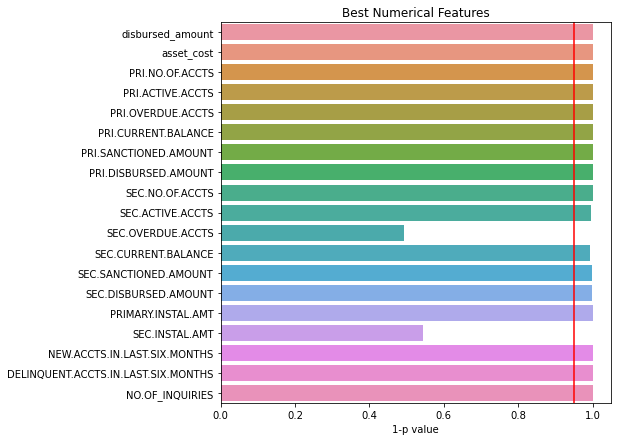

In [4]:
numerical=['disbursed_amount','asset_cost','PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES','NEW.ACCTS.IN.LAST.SIX.MONTHS', 
        'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
p=[]
from scipy.stats import ttest_ind

for i in numerical:
    df1=train_data.groupby('loan_default').get_group(0)
    df2=train_data.groupby('loan_default').get_group(1)
    t,pvalue=ttest_ind(df1[i],df2[i])
    p.append(1-pvalue)
plt.figure(figsize=(7,7))
sb.barplot(x=p, y=numerical)
plt.title('Best Numerical Features')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

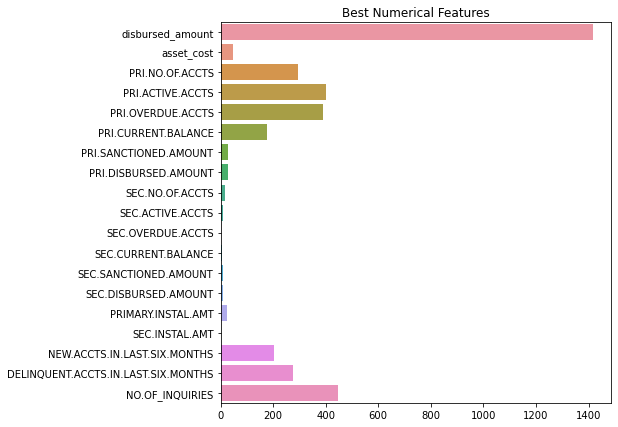

In [5]:
from sklearn.feature_selection import SelectKBest,f_classif
n = SelectKBest(score_func=f_classif, k=10)
numcols=n.fit(train_data[numerical],train_data['loan_default'])
plt.figure(figsize=(7,7))
sb.barplot(x=numcols.scores_,y=numerical)
plt.title('Best Numerical Features')
plt.show()

In [6]:
train_data.loc[:,'No of Accounts'] = train_data['PRI.NO.OF.ACCTS'] + train_data['SEC.NO.OF.ACCTS']
train_data.loc[:,'PRI Inactive accounts'] = train_data['PRI.NO.OF.ACCTS'] - train_data['PRI.ACTIVE.ACCTS']
train_data.loc[:,'SEC Inactive accounts'] = train_data['SEC.NO.OF.ACCTS'] - train_data['SEC.ACTIVE.ACCTS']
train_data.loc[:,'Total Inactive accounts'] = train_data['PRI Inactive accounts'] + train_data['SEC Inactive accounts']
train_data.loc[:,'Total Overdue Accounts'] = train_data['PRI.OVERDUE.ACCTS'] + train_data['SEC.OVERDUE.ACCTS']
train_data.loc[:,'Total Current Balance'] = train_data['PRI.CURRENT.BALANCE'] + train_data['SEC.CURRENT.BALANCE']
train_data.loc[:,'Total Sanctioned Amount'] = train_data['PRI.SANCTIONED.AMOUNT'] + train_data['SEC.SANCTIONED.AMOUNT']
train_data.loc[:,'Total Disbursed Amount'] = train_data['PRI.DISBURSED.AMOUNT'] + train_data['SEC.DISBURSED.AMOUNT']
train_data.loc[:,'Total Installment'] = train_data['PRIMARY.INSTAL.AMT'] + train_data['SEC.INSTAL.AMT']

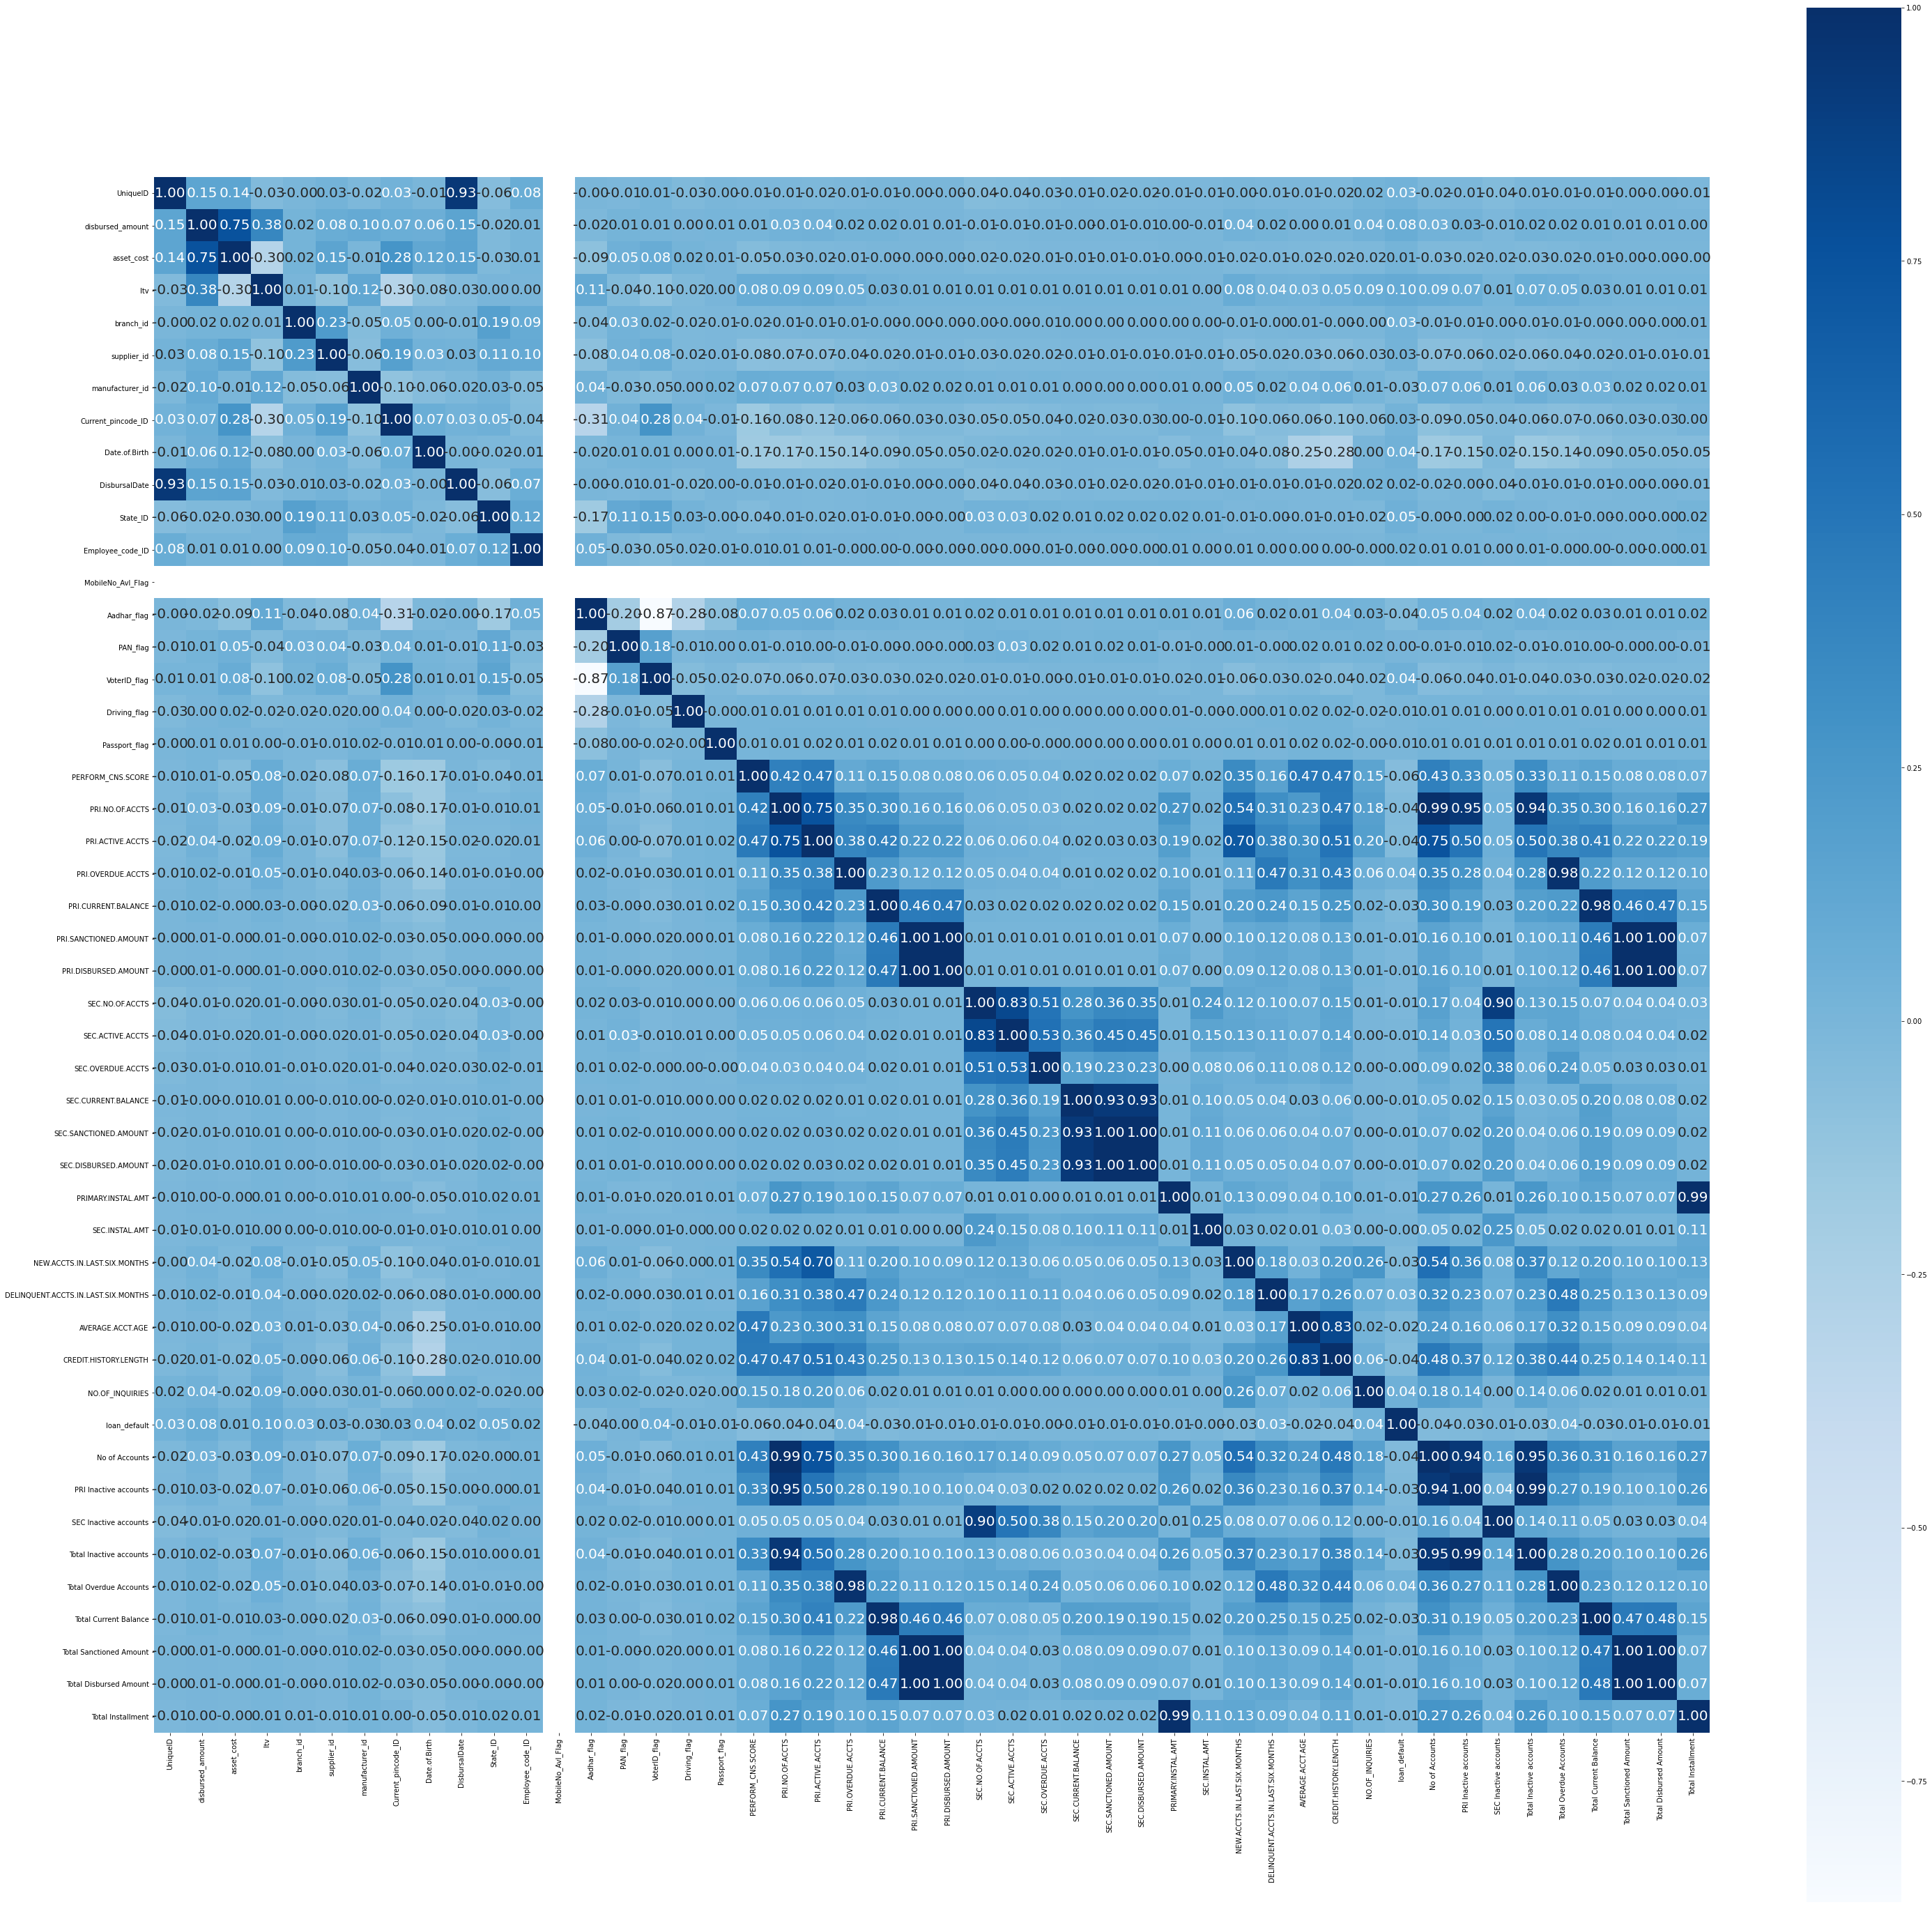

In [8]:
traindatacorr=train_data.corr()
fig, ax = plt.subplots(figsize=(50,50))
sb.heatmap(traindatacorr,annot=True,ax=ax,cmap="Blues",annot_kws={"size": 20},fmt=".2f",square=True);

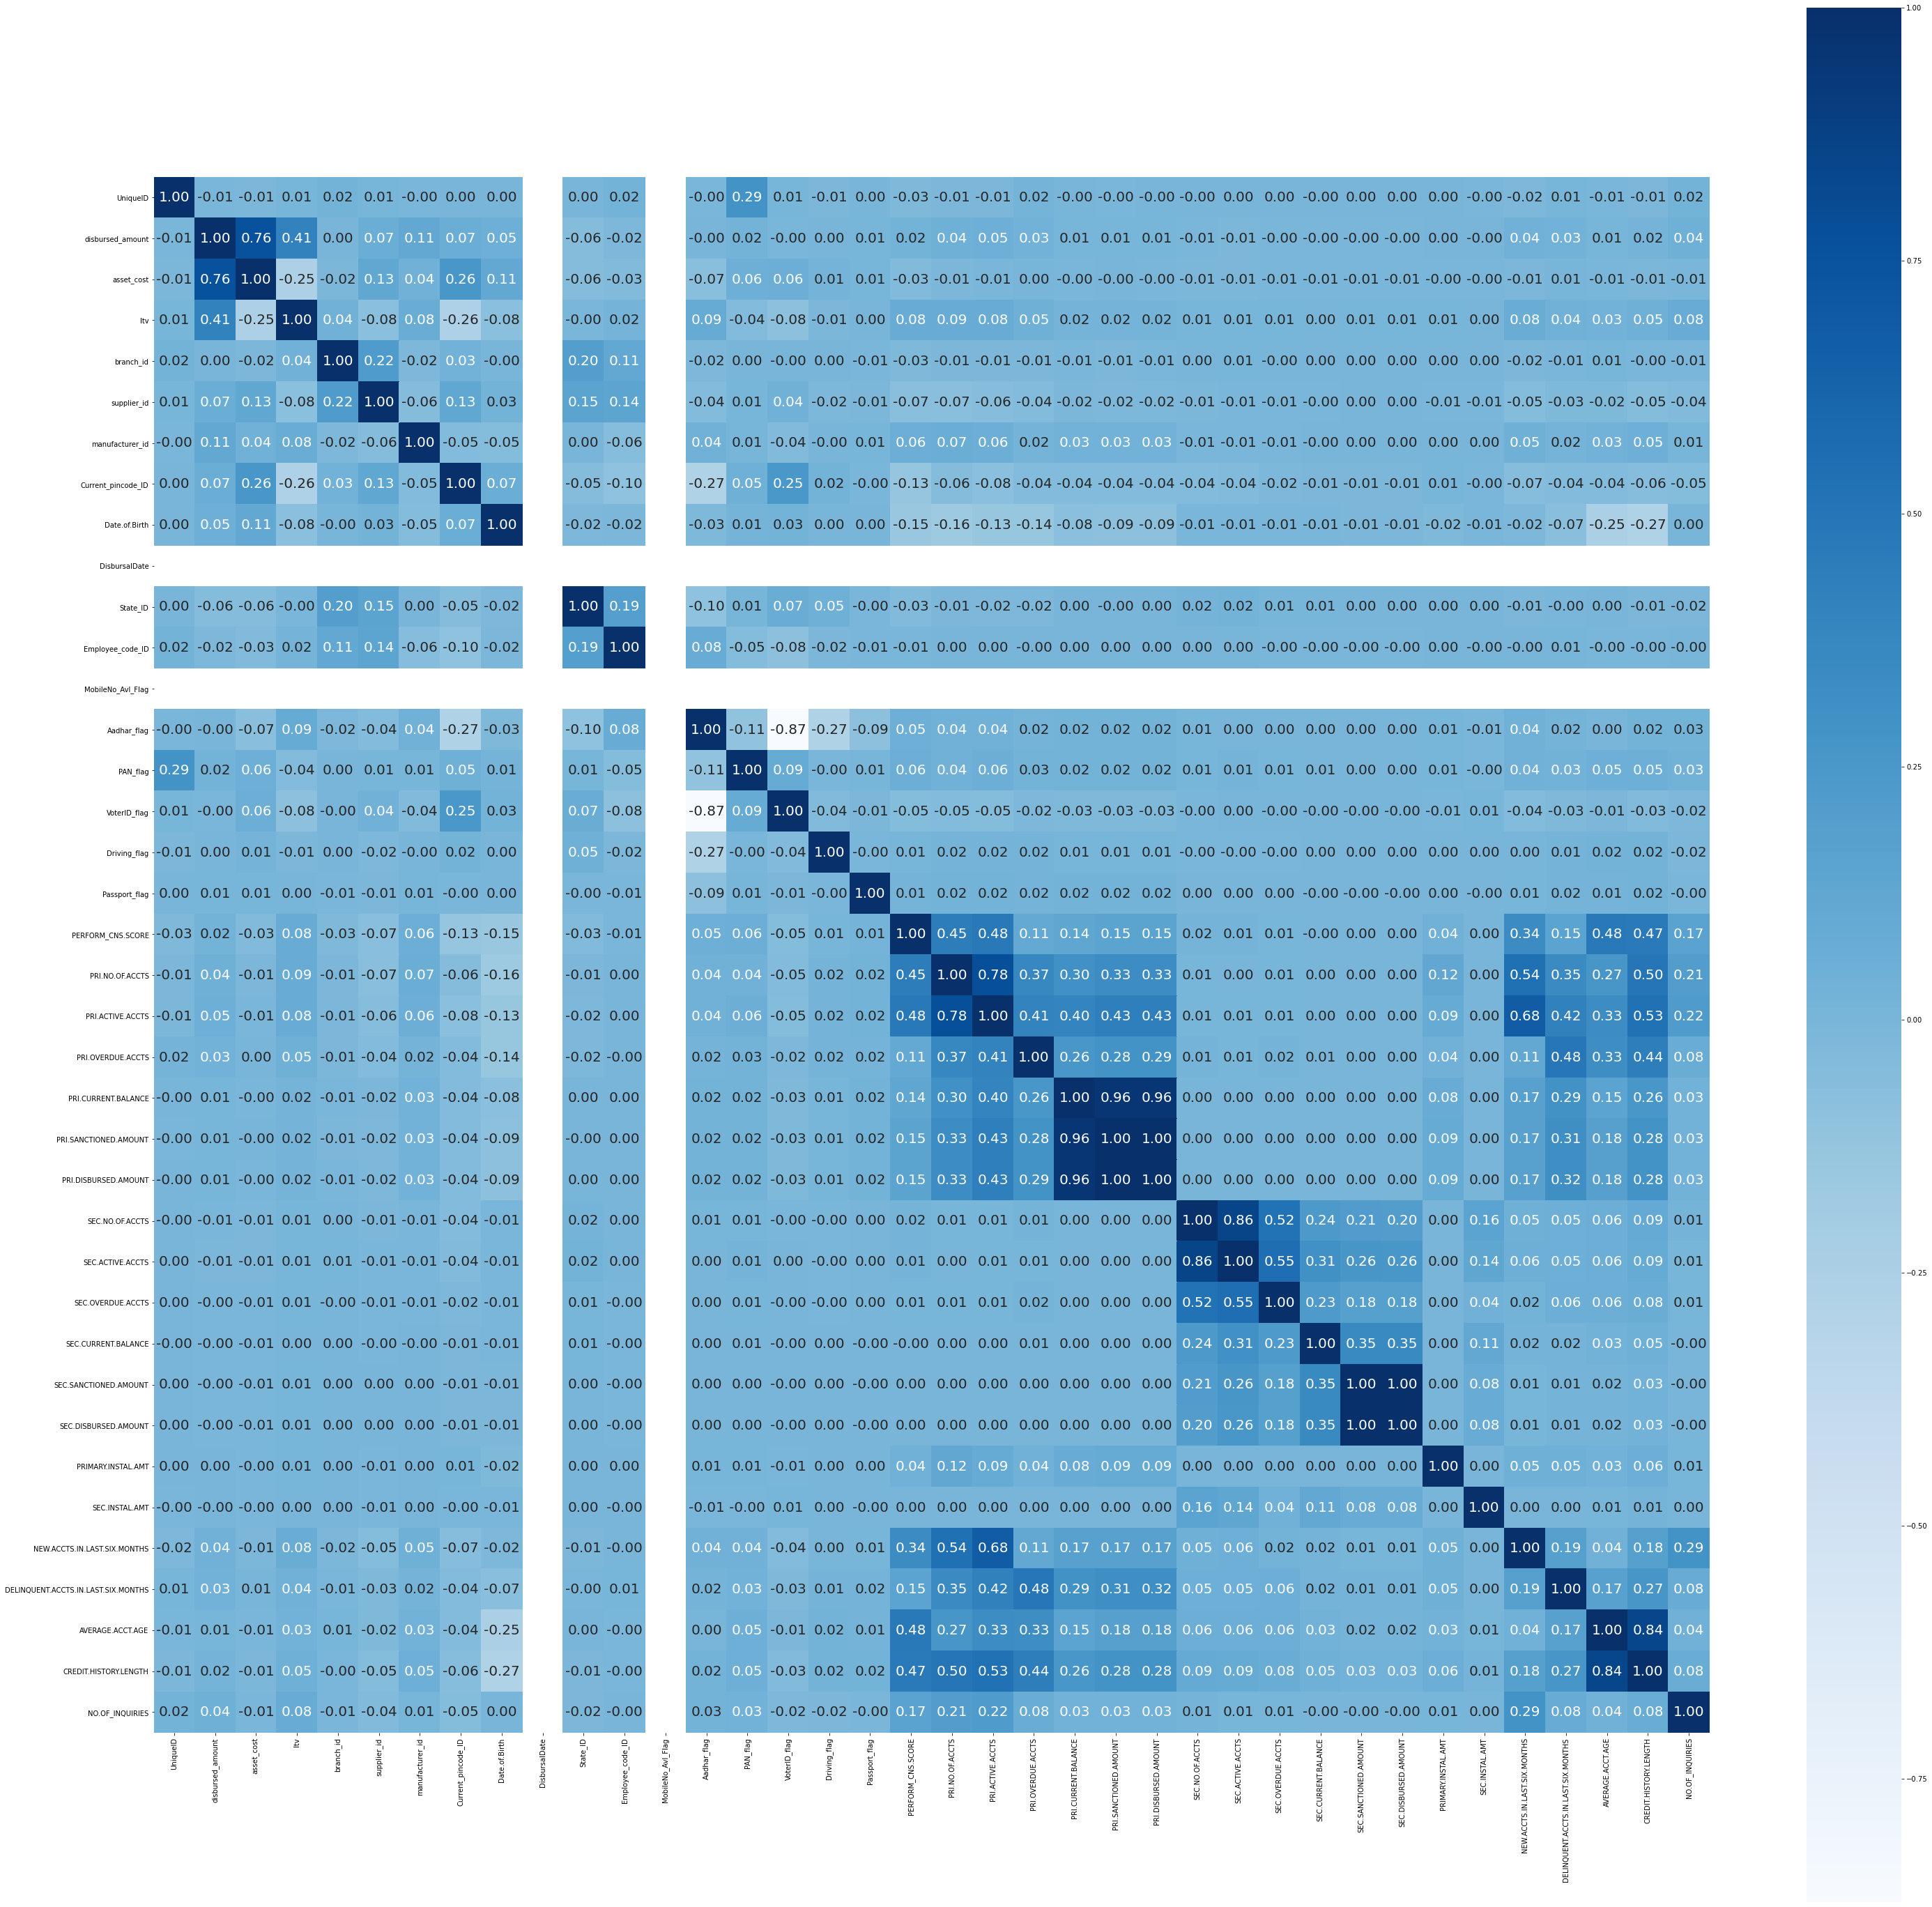

In [9]:
traindatacorr=test_data.corr()
fig, ax = plt.subplots(figsize=(50,50))
sb.heatmap(traindatacorr,annot=True,ax=ax,cmap="Blues",annot_kws={"size": 20},fmt=".2f",square=True);

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  int64  
 9   Employment_Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  int64  
 11  State_ID     

In [10]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
train_data['Employment_Type']=le.fit_transform(train_data.Employment_Type)
train_data['PERFORM_CNS_SCORE_DESCRIPTION']=le.fit_transform(train_data.PERFORM_CNS_SCORE_DESCRIPTION)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
y_dep=train_data.loan_default#loc can be given
x_ind=train_data.drop('loan_default',axis=1)
x_ind

In [ ]:
train_data.info()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=.1,random_state=2)
import statsmodels.api as stm
model_stat=stm.Logit(y_train,x_train).fit()
model_stat.summary2()